# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ML/BigData"

/content/drive/MyDrive/ML/BigData


# DF COMBINED

In [ ]:
df = pd.read_csv("./combined-data.csv")
df

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0
...,...,...,...,...,...,...,...,...
4614,1399,37261,6,mac,28,3,1.0,2.0
4615,248,37491,3,iphone,108,11,2.0,10.0
4616,981,38321,6,iphone,36,9,1.0,10.0
4617,1575,38602,3,android,11,0,NaN,NaN


# DF CLASSIFIED

In [ ]:
df_classified = pd.read_csv("./classified-data.csv")
df_classified

,platformType,count_gameclicks,count_hits,spender_type,Prediction (spender_type)
0,android,39,0,PennyPincher,PennyPincher
1,android,102,14,PennyPincher,PennyPincher
2,android,39,4,PennyPincher,PennyPincher
3,android,51,6,PennyPincher,PennyPincher
4,android,47,7,PennyPincher,PennyPincher
...,...,...,...,...,...
560,windows,115,14,PennyPincher,PennyPincher
561,android,105,15,PennyPincher,PennyPincher
562,iphone,171,20,HighRoller,HighRoller
563,linux,119,14,PennyPincher,PennyPincher


## Count platform type + relationship with spender type

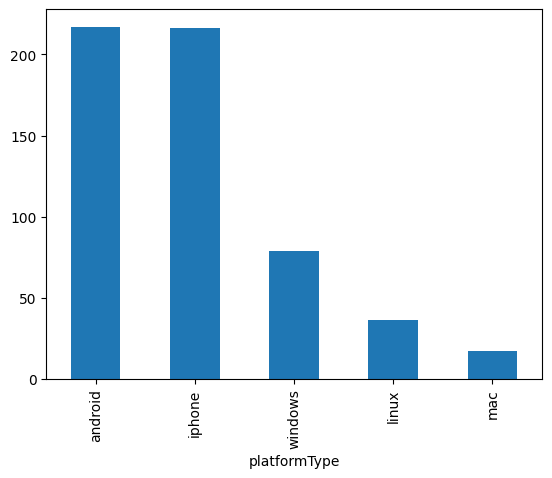

In [ ]:
platform_counts = df_classified['platformType'].value_counts().plot(kind="bar")

In [ ]:
# Create a cross-tabulation of platformType and spender_type
platform_spender_counts = pd.crosstab(df_classified['platformType'], df_classified['spender_type'])
print(platform_spender_counts)

spender_type  HighRoller  PennyPincher
platformType                          
android               33           184
iphone               181            35
linux                  2            34
mac                    2            15
windows                7            72


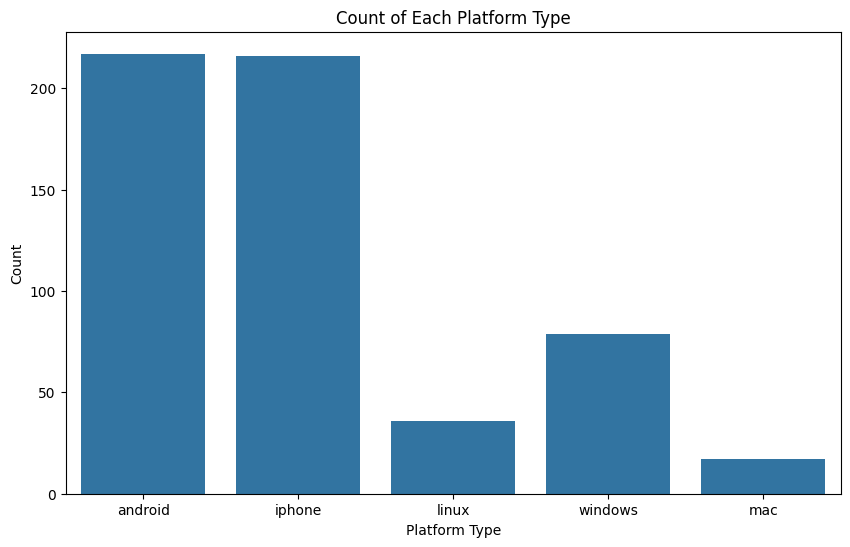

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_classified, x='platformType')
plt.title('Count of Each Platform Type')
plt.xlabel('Platform Type')
plt.ylabel('Count')
plt.show()

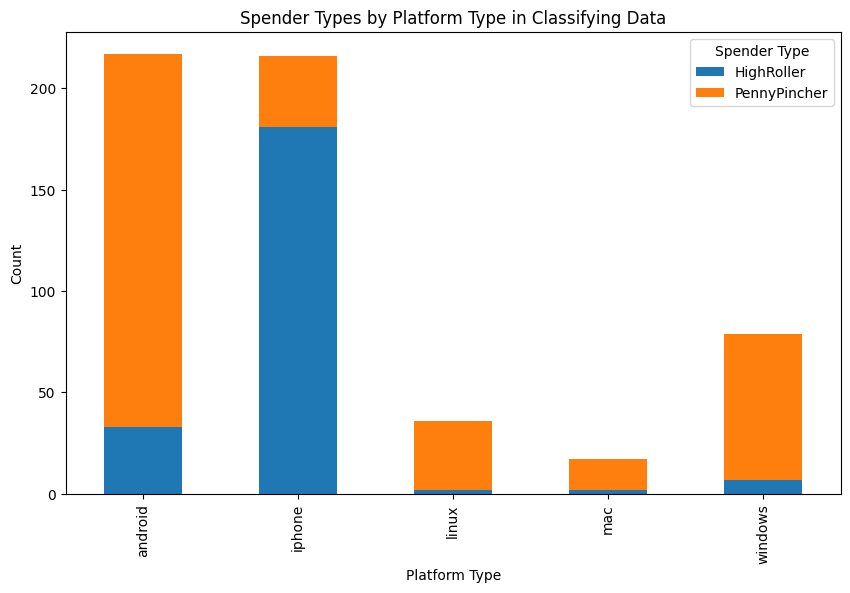

In [ ]:
# Stacked bar plot for platformType vs. spender_type
platform_spender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spender Types by Platform Type in Classifying Data')
plt.xlabel('Platform Type')
plt.ylabel('Count')
plt.legend(title='Spender Type')
plt.show()


## Game clicks and Hits

### Game clicks and hits of ground truth labels

In [ ]:
# Assuming df is your DataFrame
# Calculate descriptive statistics for each spender_type

descriptive_stats = df_classified.groupby('spender_type')[['count_gameclicks', 'count_hits']].describe()
print(descriptive_stats)

             count_gameclicks                                              \
                        count        mean         std   min    25%    50%   
spender_type                                                                
HighRoller              225.0  139.555556  104.310696  14.0  80.00  110.0   
PennyPincher            340.0  145.700000  129.202608   8.0  73.75  104.0   

                            count_hits                                        \
                 75%    max      count       mean       std  min   25%   50%   
spender_type                                                                   
HighRoller    165.00  776.0      225.0  16.555556  11.97832  1.0  9.00  14.0   
PennyPincher  163.25  829.0      340.0  16.305882  14.56591  0.0  7.75  12.0   

                          
               75%   max  
spender_type              
HighRoller    20.0  79.0  
PennyPincher  18.0  99.0  


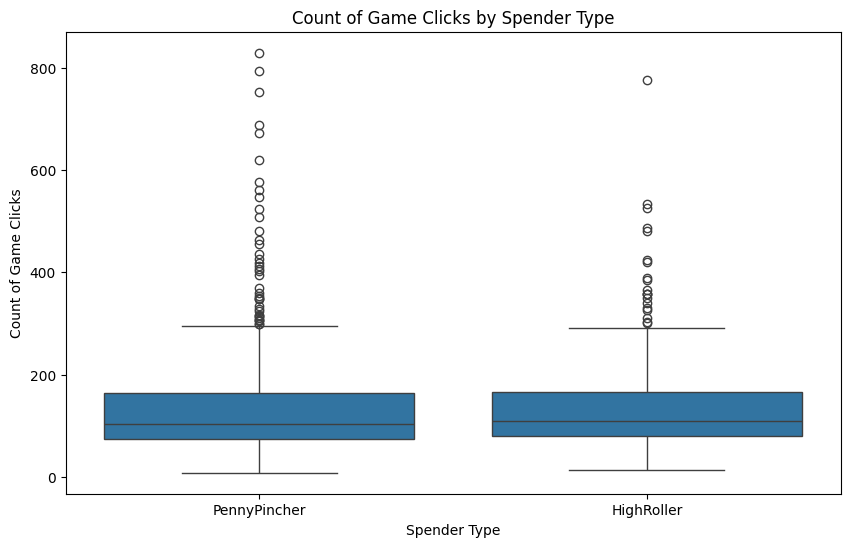

In [ ]:
# Box plot for count_gameclicks by spender_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_classified, x='spender_type', y='count_gameclicks')
plt.title('Count of Game Clicks by Spender Type')
plt.xlabel('Spender Type')
plt.ylabel('Count of Game Clicks')
plt.show()

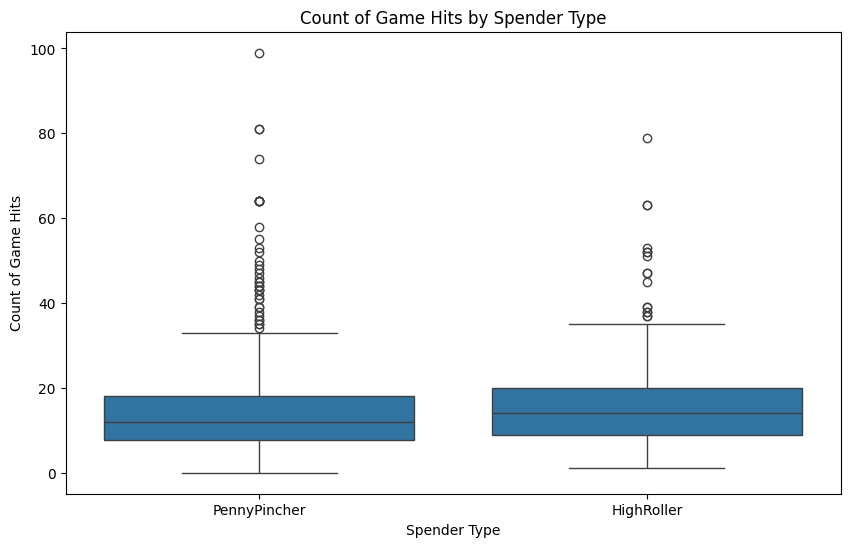

In [ ]:
# Box plot for count_hits by spender_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_classified, x='spender_type', y='count_hits')
plt.title('Count of Game Hits by Spender Type')
plt.xlabel('Spender Type')
plt.ylabel('Count of Game Hits')
plt.show()

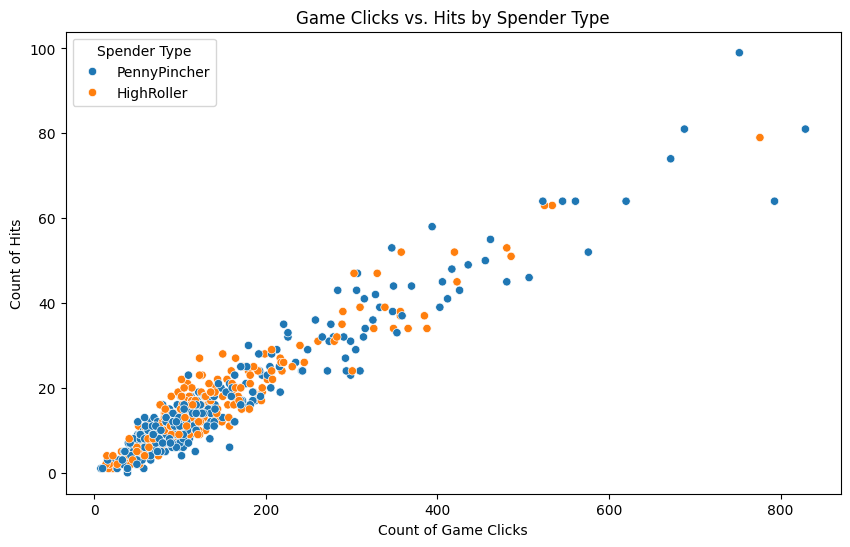

In [ ]:
# Scatter plot for count_gameclicks vs. count_hits colored by spender_type

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_classified, x='count_gameclicks', y='count_hits', hue='spender_type')
plt.title('Game Clicks vs. Hits by Spender Type')
plt.xlabel('Count of Game Clicks')
plt.ylabel('Count of Hits')
plt.legend(title='Spender Type')
plt.show()

In [ ]:
# Calculate correlation between count_gameclicks and count_hits for each spender_type

correlation_matrix = df_classified.groupby('spender_type')[['count_gameclicks', 'count_hits']].corr()

# Extract the correlations for count_gameclicks vs count_hits
correlations_hits = correlation_matrix.loc[:, 'count_hits'].unstack().iloc[:, 0]
correlations_game_clicks = correlation_matrix.loc[:, 'count_gameclicks'].unstack().iloc[:, 0]

print("Correlation count hits")
print(correlations_hits)
print("-----------")
print("Correlation count gameclicks")
print(correlations_game_clicks)

Correlation count hits
spender_type
HighRoller      0.948110
PennyPincher    0.958848
Name: count_gameclicks, dtype: float64
-----------
Correlation count gameclicks
spender_type
HighRoller      1.0
PennyPincher    1.0
Name: count_gameclicks, dtype: float64


### Game clicks and hits of predicted labels

In [ ]:
# Assuming df is your DataFrame
# Calculate descriptive statistics for each spender_type

descriptive_stats = df_classified.groupby('Prediction (spender_type)')[['count_gameclicks', 'count_hits']].describe()
print(descriptive_stats)

                          count_gameclicks                                \
                                     count        mean         std   min   
Prediction (spender_type)                                                  
HighRoller                           216.0  144.375000  110.975938  14.0   
PennyPincher                         349.0  142.558739  125.179412   8.0   

                                                      count_hits             \
                            25%    50%     75%    max      count       mean   
Prediction (spender_type)                                                     
HighRoller                 82.0  110.5  165.25  776.0      216.0  17.217593   
PennyPincher               72.0  104.0  160.00  829.0      349.0  15.902579   

                                                                  
                                 std  min  25%   50%   75%   max  
Prediction (spender_type)                                         
HighRoller            

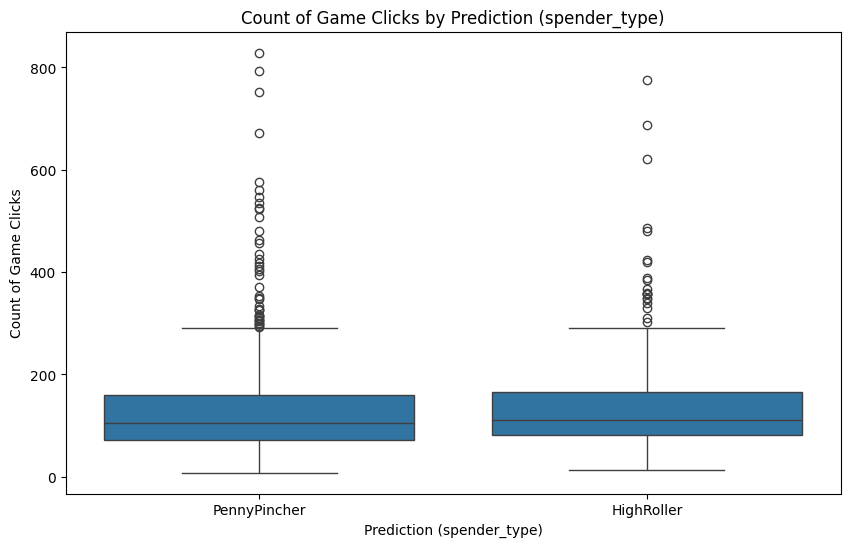

In [ ]:
# Box plot for count_gameclicks by spender_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_classified, x='Prediction (spender_type)', y='count_gameclicks')
plt.title('Count of Game Clicks by Prediction (spender_type)')
plt.xlabel('Prediction (spender_type)')
plt.ylabel('Count of Game Clicks')
plt.show()

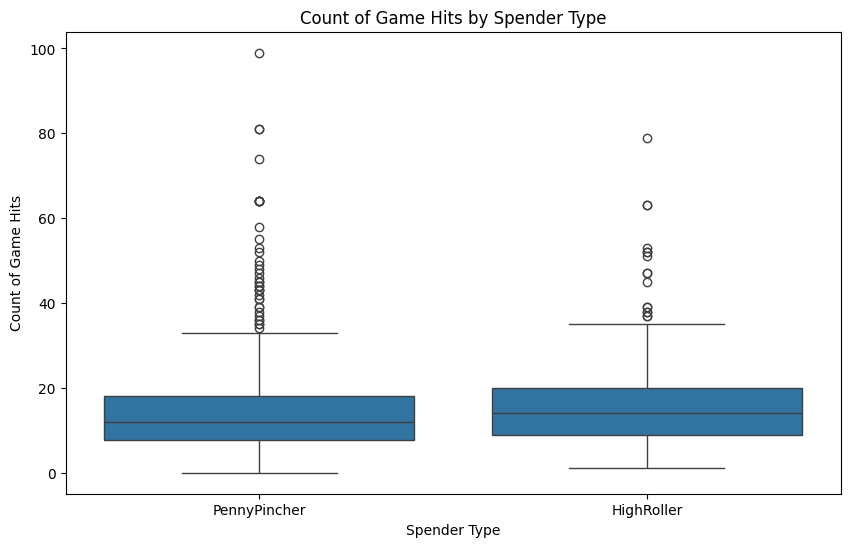

In [ ]:
# Box plot for count_hits by spender_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_classified, x='spender_type', y='count_hits')
plt.title('Count of Game Hits by Spender Type')
plt.xlabel('Spender Type')
plt.ylabel('Count of Game Hits')
plt.show()

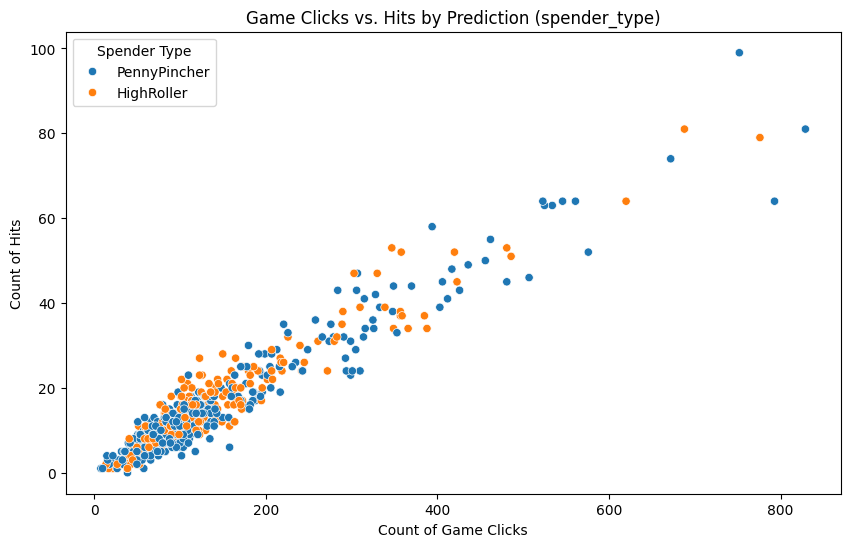

In [ ]:
# Scatter plot for count_gameclicks vs. count_hits colored by spender_type

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_classified, x='count_gameclicks', y='count_hits', hue='Prediction (spender_type)')
plt.title('Game Clicks vs. Hits by Prediction (spender_type)')
plt.xlabel('Count of Game Clicks')
plt.ylabel('Count of Hits')
plt.legend(title='Spender Type')
plt.show()

In [ ]:
# Calculate correlation between count_gameclicks and count_hits for each spender_type

correlation_matrix = df_classified.groupby('Prediction (spender_type)')[['count_gameclicks', 'count_hits']].corr()

# Extract the correlations for count_gameclicks vs count_hits
correlations_hits = correlation_matrix.loc[:, 'count_hits'].unstack().iloc[:, 0]
correlations_game_clicks = correlation_matrix.loc[:, 'count_gameclicks'].unstack().iloc[:, 0]

print("Correlation count hits")
print(correlations_hits)
print("-----------")
print("Correlation count gameclicks")
print(correlations_game_clicks)

Correlation count hits
Prediction (spender_type)
HighRoller      0.950273
PennyPincher    0.958462
Name: count_gameclicks, dtype: float64
-----------
Correlation count gameclicks
Prediction (spender_type)
HighRoller      1.0
PennyPincher    1.0
Name: count_gameclicks, dtype: float64


## Error analysis

In [ ]:
# Extract False Positives and False Negatives

false_positives = df_classified[(df_classified['spender_type'] == 'PennyPincher') & (df_classified['Prediction (spender_type)'] == 'HighRoller')]
false_negatives = df_classified[(df_classified['spender_type'] == 'HighRoller') & (df_classified['Prediction (spender_type)'] == 'PennyPincher')]
true_positives = df_classified[(df_classified['spender_type'] == 'HighRoller') & (df_classified['Prediction (spender_type)'] == 'HighRoller')]
true_negatives = df_classified[(df_classified['spender_type'] == 'PennyPincher') & (df_classified['Prediction (spender_type)'] == 'PennyPincher')]

In [ ]:
total_data = pd.concat([
    false_positives.assign(error_type='False Positive'),
    false_negatives.assign(error_type='False Negative'),
    true_positives.assign(error_type='True Positive'),
    true_negatives.assign(error_type='True Negative'),
])

### Error analysis: Count platform type + relationship with spender type

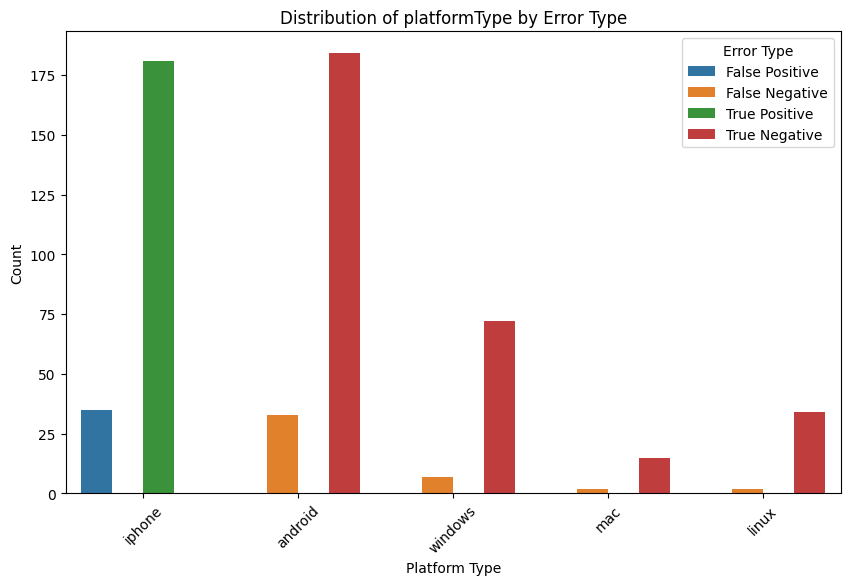

In [ ]:
# Assuming total_data is already defined as per your code
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=total_data, x='platformType', hue='error_type')

# Set plot title and labels
plt.title('Distribution of platformType by Error Type')
plt.xlabel('Platform Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Error Type')
plt.show()

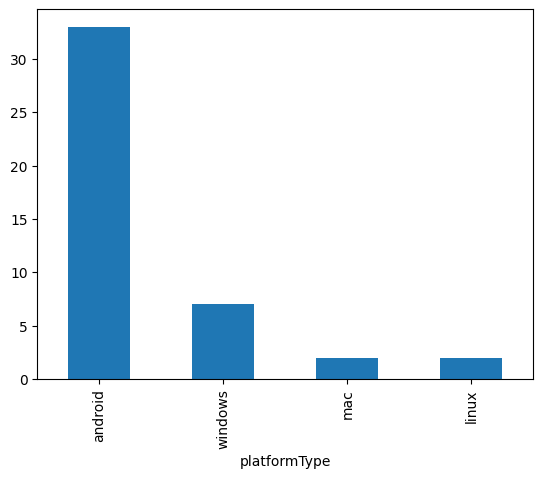

In [ ]:
# False negative
platform_counts = false_negatives['platformType'].value_counts().plot(kind="bar")

### Error analysis: Game clicks and hits

In [ ]:
# Descriptive statistics for False Positives and False Negatives
total_data_stats = total_data.groupby('error_type')[['count_gameclicks', 'count_hits']].describe()
print(total_data_stats)

               count_gameclicks                                              \
                          count        mean         std   min    25%    50%   
error_type                                                                    
False Negative             44.0  131.636364  110.568319  15.0  67.25  102.5   
False Positive             35.0  159.342857  146.563366  39.0  79.00  105.0   
True Negative             305.0  144.134426  127.235581   8.0  73.00  104.0   
True Positive             181.0  141.480663  102.960650  14.0  82.00  111.0   

                             count_hits                                        \
                  75%    max      count       mean        std  min  25%   50%   
error_type                                                                      
False Negative  154.0  534.0       44.0  14.613636  12.753870  2.0  8.0  12.0   
False Positive  167.5  688.0       35.0  18.200000  17.013489  1.0  9.5  13.0   
True Negative   161.0  829.0      305.0  

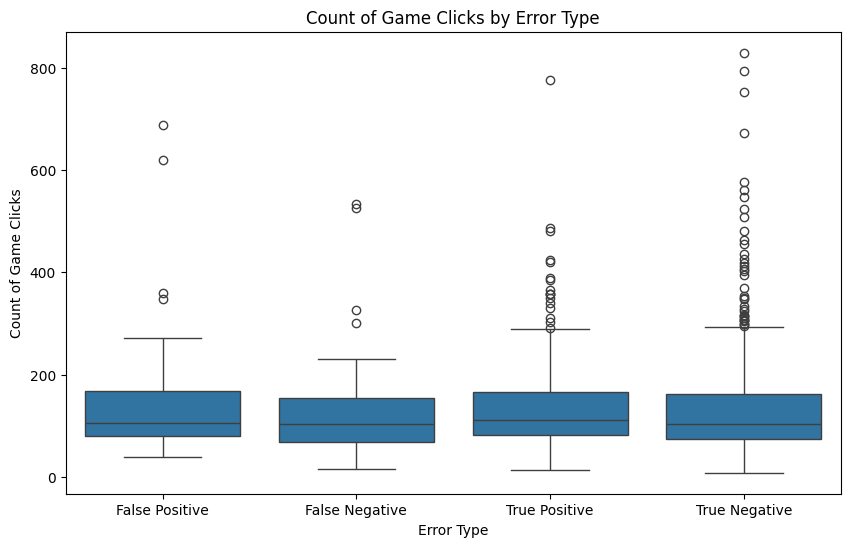

In [ ]:
# Box plot for count_gameclicks by error_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data, x='error_type', y='count_gameclicks')
plt.title('Count of Game Clicks by Error Type')
plt.xlabel('Error Type')
plt.ylabel('Count of Game Clicks')
plt.show()

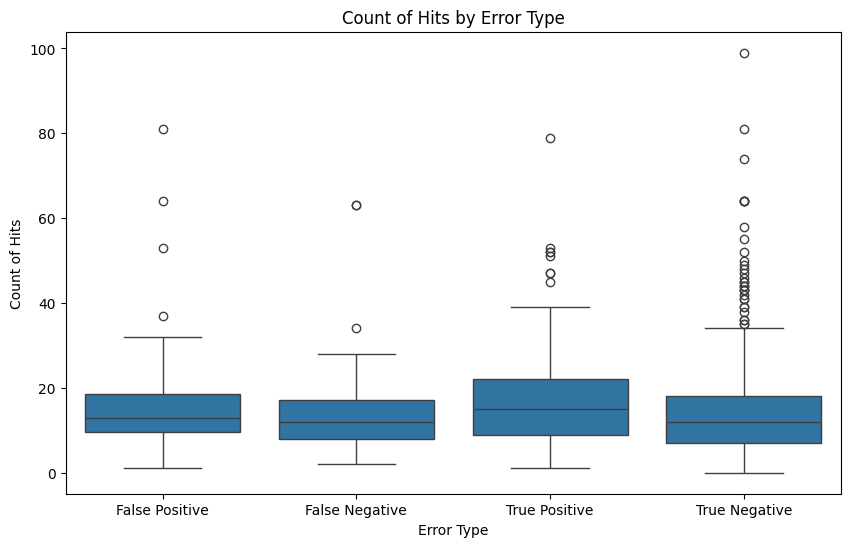

In [ ]:
# Box plot for count_hits by error_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data, x='error_type', y='count_hits')
plt.title('Count of Hits by Error Type')
plt.xlabel('Error Type')
plt.ylabel('Count of Hits')
plt.show()

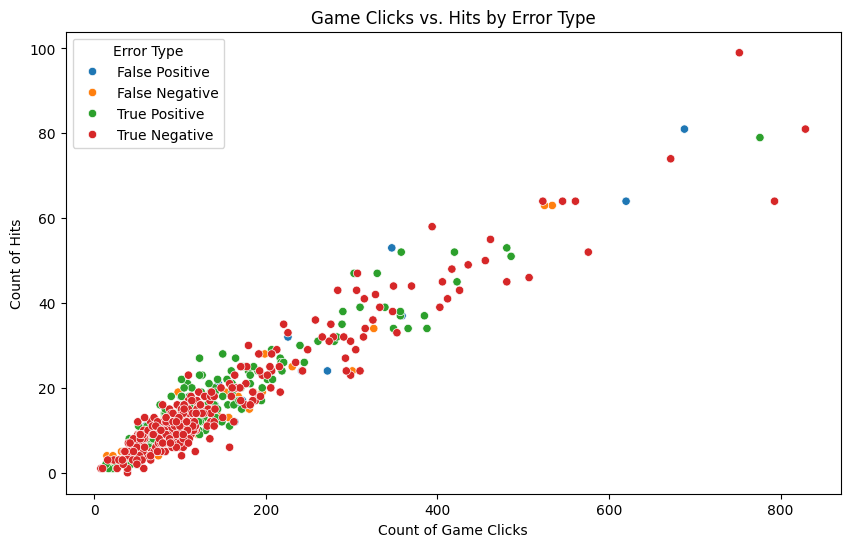

In [ ]:
# Scatter plot for count_gameclicks vs. count_hits colored by error-type

plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_data, x='count_gameclicks', y='count_hits', hue='error_type')
plt.title('Game Clicks vs. Hits by Error Type')
plt.xlabel('Count of Game Clicks')
plt.ylabel('Count of Hits')
plt.legend(title='Error Type')
plt.show()

In [ ]:
# Calculate correlation between count_gameclicks and count_hits for each error_type

correlation_matrix = total_data.groupby('error_type')[['count_gameclicks', 'count_hits']].corr()

# Extract the correlations for count_gameclicks vs count_hits
correlations_hits = correlation_matrix.loc[:, 'count_hits'].unstack().iloc[:, 0]
correlations_game_clicks = correlation_matrix.loc[:, 'count_gameclicks'].unstack().iloc[:, 0]

print("Correlation count hits")
print(correlations_hits)
print("-----------")
print("Correlation count gameclicks")
print(correlations_game_clicks)

Correlation count hits
error_type
False Negative    0.965984
False Positive    0.967089
True Negative     0.957620
True Positive     0.944057
Name: count_gameclicks, dtype: float64
-----------
Correlation count gameclicks
error_type
False Negative    1.0
False Positive    1.0
True Negative     1.0
True Positive     1.0
Name: count_gameclicks, dtype: float64


# DF TRAIN DATA

In [ ]:
df_train_data = pd.read_csv("./train-data.csv")
df_train_data

,platformType,count_gameclicks,count_hits,spender_type
0,iphone,129,9,HighRoller
1,android,90,10,PennyPincher
2,iphone,51,8,HighRoller
3,android,47,5,PennyPincher
4,android,46,7,PennyPincher
...,...,...,...,...
841,android,206,25,PennyPincher
842,mac,741,64,PennyPincher
843,iphone,190,21,PennyPincher
844,mac,28,3,PennyPincher


## Count platform type + relationship with spender type

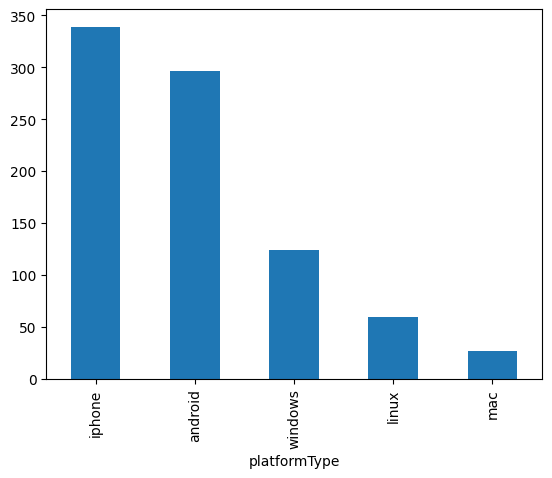

In [ ]:
platform_counts = df_train_data['platformType'].value_counts().plot(kind="bar")

In [ ]:
# Create a cross-tabulation of platformType and spender_type
platform_spender_counts = pd.crosstab(df_train_data['platformType'], df_train_data['spender_type'])
print(platform_spender_counts)

spender_type  HighRoller  PennyPincher
platformType                          
android               37           259
iphone               290            49
linux                  0            60
mac                   11            16
windows               12           112


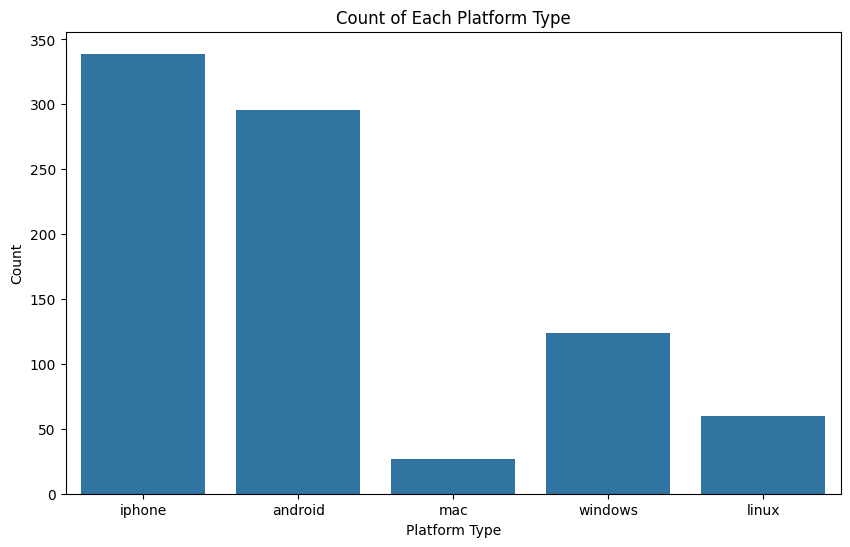

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_data, x='platformType')
plt.title('Count of Each Platform Type')
plt.xlabel('Platform Type')
plt.ylabel('Count')
plt.show()

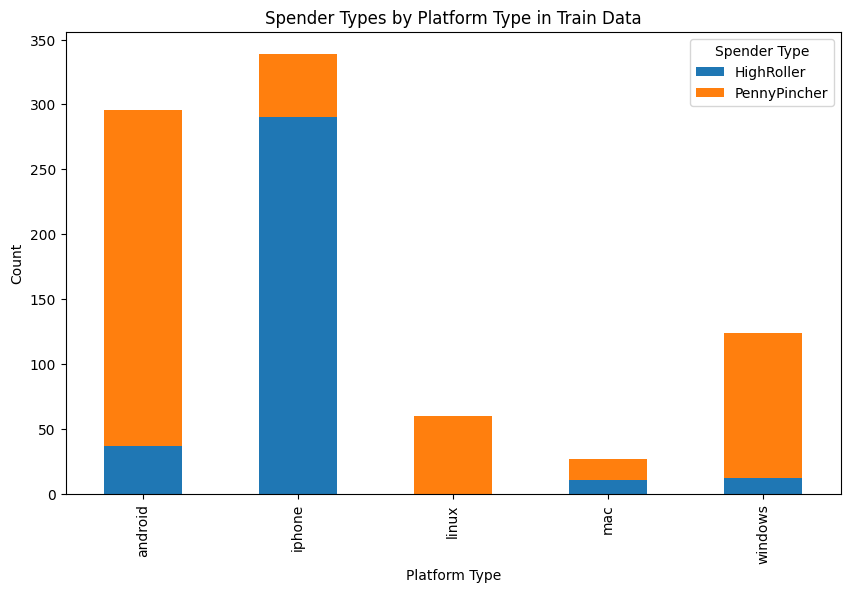

In [ ]:
# Stacked bar plot for platformType vs. spender_type
platform_spender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spender Types by Platform Type in Train Data')
plt.xlabel('Platform Type')
plt.ylabel('Count')
plt.legend(title='Spender Type')
plt.show()


## Game clicks and Hits

In [ ]:
# Assuming df is your DataFrame
# Calculate descriptive statistics for each spender_type

descriptive_stats = df_train_data.groupby('spender_type')[['count_gameclicks', 'count_hits']].describe()
print(descriptive_stats)

             count_gameclicks                                             \
                        count        mean         std   min   25%    50%   
spender_type                                                               
HighRoller              350.0  142.768571  111.058624   6.0  86.0  112.0   
PennyPincher            496.0  149.231855  125.574062  12.0  80.0  110.0   

                           count_hits                                        \
                75%    max      count       mean        std  min  25%   50%   
spender_type                                                                  
HighRoller    158.0  982.0      350.0  17.397143  13.299912  2.0  9.0  14.0   
PennyPincher  159.5  965.0      496.0  16.709677  13.741348  1.0  8.0  13.0   

                           
               75%    max  
spender_type               
HighRoller    21.0  100.0  
PennyPincher  19.0   99.0  


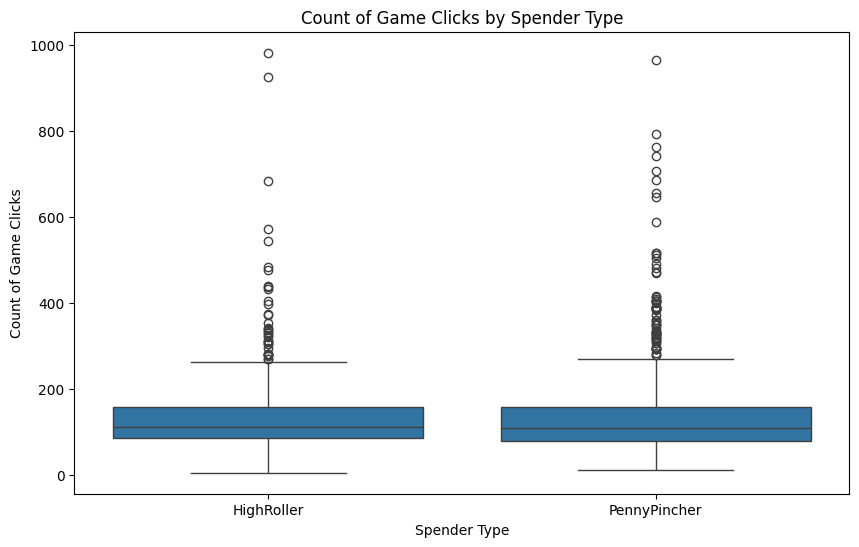

In [ ]:
# Box plot for count_gameclicks by spender_type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train_data, x='spender_type', y='count_gameclicks')
plt.title('Count of Game Clicks by Spender Type')
plt.xlabel('Spender Type')
plt.ylabel('Count of Game Clicks')
plt.show()

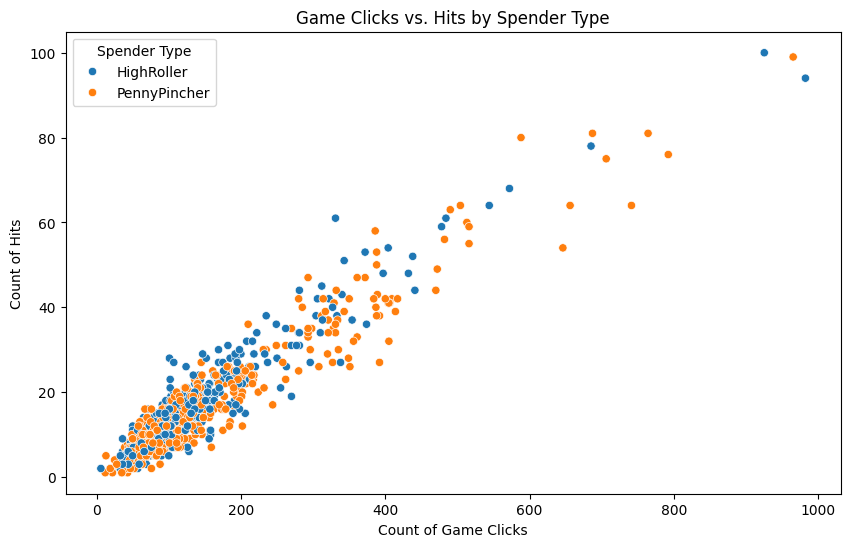

In [ ]:
# Scatter plot for count_gameclicks vs. count_hits colored by spender_type

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train_data, x='count_gameclicks', y='count_hits', hue='spender_type')
plt.title('Game Clicks vs. Hits by Spender Type')
plt.xlabel('Count of Game Clicks')
plt.ylabel('Count of Hits')
plt.legend(title='Spender Type')
plt.show()

In [ ]:
# Calculate correlation between count_gameclicks and count_hits for each spender_type

correlation_matrix = df_train_data.groupby('spender_type')[['count_gameclicks', 'count_hits']].corr()

# Extract the correlations for count_gameclicks vs count_hits
correlations_hits = correlation_matrix.loc[:, 'count_hits'].unstack().iloc[:, 0]
correlations_game_clicks = correlation_matrix.loc[:, 'count_gameclicks'].unstack().iloc[:, 0]

print("Correlation count hits")
print(correlations_hits)
print("-----------")
print("Correlation count gameclicks")
print(correlations_game_clicks)

Correlation count hits
spender_type
HighRoller      0.941827
PennyPincher    0.952204
Name: count_gameclicks, dtype: float64
-----------
Correlation count gameclicks
spender_type
HighRoller      1.0
PennyPincher    1.0
Name: count_gameclicks, dtype: float64
